In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import mglearn

# 7章 テキストデータの処理

In [2]:
from sklearn.datasets import load_files

reviews_train = load_files("aclImdb/train/")

In [3]:
text_train, y_train = reviews_train.data, reviews_train.target

In [4]:
reviews_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [5]:
reviews_train.target

array([1, 0, 1, ..., 0, 0, 0])

In [6]:
reviews_train.DESCR

In [7]:
print(type(text_train))
print(len(text_train))
print(text_train[0])

<class 'list'>
25000
b"Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty."


In [8]:
text_train = [doc.replace(b"<br />", b"") for doc in text_train]
text_train[0]

b"Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. Flawed but honest with a terrible honesty."

In [9]:
np.bincount(y_train)

array([12500, 12500])

In [10]:
reviews_test = load_files("aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target
print(len(text_test))
print(np.bincount(y_test))
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

25000
[12500 12500]


In [11]:
bards_words =["The fool doth think he is wise,",
"but the wise man knows himself to be a fool"]

from sklearn.feature_extraction.text import CountVectorizer
vect =CountVectorizer()
vect.fit(bards_words)
vect.vocabulary_

{'be': 0,
 'but': 1,
 'doth': 2,
 'fool': 3,
 'he': 4,
 'himself': 5,
 'is': 6,
 'knows': 7,
 'man': 8,
 'the': 9,
 'think': 10,
 'to': 11,
 'wise': 12}

In [12]:
bag_of_words = vect.transform(bards_words)
print(repr(bag_of_words))

<2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


In [13]:
bag_of_words.toarray()

array([[0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1],
       [1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1]])

# 7.3.2 映画レビューのBoW

In [14]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train) # Bow: bag of words
print(repr(X_train))

<25000x75911 sparse matrix of type '<class 'numpy.int64'>'
	with 3431163 stored elements in Compressed Sparse Row format>


In [15]:
X_train.shape

(25000, 75911)

In [16]:
feature_names = vect.get_feature_names()
print(feature_names[:20])
print()
print(feature_names[20000:20010])
print()
print(feature_names[::20000])

['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02']

['dop', 'dope', 'doped', 'dopes', 'dopey', 'dopiest', 'dopiness', 'doping', 'doppelgang', 'doppelganger']

['00', 'dop', 'looping', 'shaffer']


In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5, n_jobs=4)
print(np.mean(scores))

0.881


In [18]:
from sklearn.model_selection import GridSearchCV
param_grid = {"C":[0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, n_jobs=4)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)

0.88844
{'C': 0.1}


In [19]:
X_test = vect.transform(text_test)
grid.score(X_test, y_test)

0.87892

In [20]:
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print(repr(X_train))

<25000x27264 sparse matrix of type '<class 'numpy.int64'>'
	with 3352876 stored elements in Compressed Sparse Row format>


In [21]:
feature_names = vect.get_feature_names()
print(len(feature_names))
print(feature_names[:50])
print(feature_names[20010:20030])
print(feature_names[::700])

27264
['00', '000', '007', '00s', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '100th', '101', '102', '103', '104', '105', '107', '108', '10s', '10th', '11', '110', '112', '116', '117', '11th', '12', '120', '12th', '13', '135', '13th', '14', '140', '14th', '15', '150', '15th', '16', '160', '1600', '16mm', '16s', '16th']
['repetition', 'repetitions', 'repetitious', 'repetitive', 'rephrase', 'replace', 'replaced', 'replacement', 'replaces', 'replacing', 'replay', 'replayed', 'replaying', 'replays', 'replete', 'replica', 'replicas', 'replicate', 'replied', 'replies']
['00', 'affectionate', 'appropriate', 'barbet', 'blur', 'butch', 'cheery', 'commit', 'courtroom', 'deconstruct', 'disgraceful', 'dvr', 'escort', 'fella', 'freezing', 'gorillas', 'havana', 'hunk', 'insist', 'juice', 'left', 'mafia', 'met', 'musicals', 'occult', 'parliament', 'pleasence', 'prop', 'recites', 'revisionist', 'sassy', 'shedding', 'sniff', 'stems', 'swear', 'thugs', 'tween', 'vanish', '

In [22]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, n_jobs=4)
grid.fit(X_train, y_train)
print(grid.best_score_)

0.888


# 7.4 ストップワード

In [23]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

print(len(ENGLISH_STOP_WORDS))
print(type(ENGLISH_STOP_WORDS))

318
<class 'frozenset'>


In [24]:
print(list(ENGLISH_STOP_WORDS)[::10])

['bottom', 'name', 'still', 'i', 'hereafter', 'must', 'towards', 'thick', 'perhaps', 'among', 'per', 'your', 'it', 'myself', 'they', 'fifty', 'can', 'whereby', 'those', 'almost', 'or', 'two', 'give', 'never', 'but', 'both', 'beyond', 'namely', 'co', 'elsewhere', 'have', 'part']


In [25]:
vect = CountVectorizer(min_df=5, stop_words="english").fit(text_train)
X_train = vect.transform(text_train)

In [26]:
print(repr(X_train))

<25000x26959 sparse matrix of type '<class 'numpy.int64'>'
	with 2149073 stored elements in Compressed Sparse Row format>


In [27]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, n_jobs=4)
grid.fit(X_train, y_train)
print(grid.best_score_)

0.883


# 7.5 tf–idfを用いたデータのスケール変換

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(TfidfVectorizer(min_df=5, norm=None),
                    LogisticRegression())
param_grid = {"logisticregression__C":[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=4)
grid.fit(text_train, y_train)
print(grid.best_score_)

0.89376


In [29]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
X_train = vectorizer.transform(text_train)
print(X_train.shape)
max_value = X_train.max(axis=0).toarray().ravel()
sorted_byidf = max_value.argsort()
feature_names = np.array(vectorizer.get_feature_names())
print(feature_names)
print(feature_names[sorted_byidf[:20]])
print(feature_names[sorted_byidf[-20:]])

(25000, 27264)
['00' '000' '007' ... 'zuniga' 'zwick' 'émigré']
['poignant' 'disagree' 'instantly' 'importantly' 'lacked' 'occurred'
 'currently' 'altogether' 'nearby' 'undoubtedly' 'directs' 'avoided'
 'fond' 'stinker' 'emphasis' 'commented' 'disappoint' 'realizing'
 'downhill' 'inane']
['coop' 'homer' 'dillinger' 'hackenstein' 'gadget' 'taker' 'macarthur'
 'vargas' 'jesse' 'basket' 'dominick' 'the' 'victor' 'bridget' 'victoria'
 'khouri' 'zizek' 'rob' 'timon' 'titanic']


In [30]:
max_value

array([20.15985557, 34.37105041, 16.70816476, ..., 25.46284132,
       28.0047349 ,  9.33491163])

In [31]:
X_train.max(axis=0)

<1x27264 sparse matrix of type '<class 'numpy.float64'>'
	with 27264 stored elements in COOrdinate format>

In [32]:
X_train.max(axis=0).toarray()

array([[20.15985557, 34.37105041, 16.70816476, ..., 25.46284132,
        28.0047349 ,  9.33491163]])

In [33]:
X_train.max(axis=0).toarray().ravel()

array([20.15985557, 34.37105041, 16.70816476, ..., 25.46284132,
       28.0047349 ,  9.33491163])

In [34]:
X_train.max(axis=0).toarray().shape, X_train.max(axis=0).toarray().ravel().shape

((1, 27264), (27264,))

In [35]:
print(max_value[:10])
print(sorted_byidf[:10])

arrray1 = np.array([1,20,3,40,5])
arrray1.argsort()

[20.15985557 34.37105041 16.70816476  9.18076095 23.72338583 16.70816476
 18.66982327 28.0047349  17.12344349 16.97522755]
[18276  6912 12628 12198 13737 16811  5959  1009 16307 25463]


array([0, 2, 4, 1, 3])

In [36]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print(feature_names[sorted_by_idf[:100]])

['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when'
 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really' 'story'
 'which' 'well' 'had' 'me' 'than' 'much' 'their' 'get' 'were' 'other'
 'been' 'do' 'most' 'don' 'her' 'also' 'into' 'first' 'made' 'how' 'great'
 'because' 'will' 'people' 'make' 'way' 'could' 'we' 'bad' 'after' 'any'
 'too' 'then' 'them' 'she' 'watch' 'think' 'acting' 'movies' 'seen' 'its'
 'him']


# 7.6 モデル係数の調査

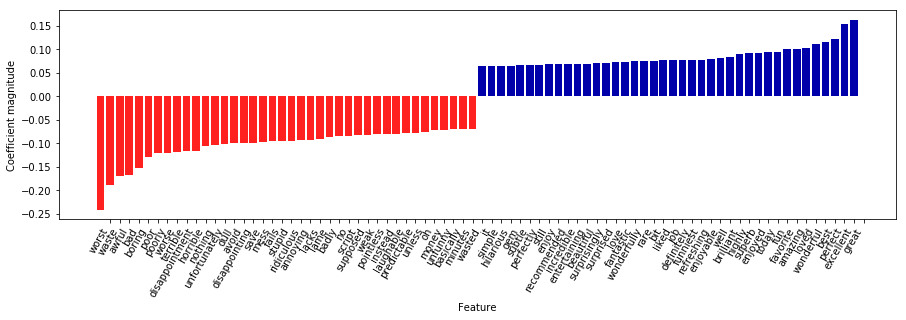

In [37]:
mglearn.tools.visualize_coefficients(
    grid.best_estimator_.named_steps["logisticregression"].coef_, 
feature_names, n_top_features=40)

In [38]:
grid.best_estimator_.named_steps["logisticregression"].coef_

array([[-0.00547158, -0.00395342, -0.00049657, ...,  0.00010083,
        -0.00064249, -0.00403677]])

In [39]:
feature_names

array(['00', '000', '007', ..., 'zuniga', 'zwick', 'émigré'], dtype='<U20')

# 7.7 1単語よりも大きい単位のBag-of-Words (n-グラム)

In [40]:
bards_words

['The fool doth think he is wise,',
 'but the wise man knows himself to be a fool']

In [41]:
cv = CountVectorizer(ngram_range=(1,1)).fit(bards_words)
len(cv.vocabulary_)

13

In [42]:
cv.get_feature_names()

['be',
 'but',
 'doth',
 'fool',
 'he',
 'himself',
 'is',
 'knows',
 'man',
 'the',
 'think',
 'to',
 'wise']

In [43]:
cv = CountVectorizer(ngram_range=(2,2)).fit(bards_words)
print(len(cv.vocabulary_))
print(cv.get_feature_names())

14
['be fool', 'but the', 'doth think', 'fool doth', 'he is', 'himself to', 'is wise', 'knows himself', 'man knows', 'the fool', 'the wise', 'think he', 'to be', 'wise man']


In [44]:
cv = CountVectorizer(ngram_range=(1,2)).fit(bards_words)
print(len(cv.vocabulary_))
print(cv.get_feature_names())

27
['be', 'be fool', 'but', 'but the', 'doth', 'doth think', 'fool', 'fool doth', 'he', 'he is', 'himself', 'himself to', 'is', 'is wise', 'knows', 'knows himself', 'man', 'man knows', 'the', 'the fool', 'the wise', 'think', 'think he', 'to', 'to be', 'wise', 'wise man']


In [45]:
cv = CountVectorizer(ngram_range=(3,3)).fit(bards_words)
print(len(cv.vocabulary_))
print(cv.get_feature_names())

12
['but the wise', 'doth think he', 'fool doth think', 'he is wise', 'himself to be', 'knows himself to', 'man knows himself', 'the fool doth', 'the wise man', 'think he is', 'to be fool', 'wise man knows']


In [46]:
cv = CountVectorizer(ngram_range=(1,3)).fit(bards_words)
print(len(cv.vocabulary_))
print(cv.get_feature_names())

39
['be', 'be fool', 'but', 'but the', 'but the wise', 'doth', 'doth think', 'doth think he', 'fool', 'fool doth', 'fool doth think', 'he', 'he is', 'he is wise', 'himself', 'himself to', 'himself to be', 'is', 'is wise', 'knows', 'knows himself', 'knows himself to', 'man', 'man knows', 'man knows himself', 'the', 'the fool', 'the fool doth', 'the wise', 'the wise man', 'think', 'think he', 'think he is', 'to', 'to be', 'to be fool', 'wise', 'wise man', 'wise man knows']


In [47]:
cv = CountVectorizer(ngram_range=(2,2)).fit(bards_words)
print(len(cv.vocabulary_))
print(cv.get_feature_names())

14
['be fool', 'but the', 'doth think', 'fool doth', 'he is', 'himself to', 'is wise', 'knows himself', 'man knows', 'the fool', 'the wise', 'think he', 'to be', 'wise man']


In [48]:
cv.transform(bards_words).toarray()

array([[0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0],
       [1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1]])

In [49]:
cv.transform(bards_words)

<2x14 sparse matrix of type '<class 'numpy.int64'>'
	with 14 stored elements in Compressed Sparse Row format>

In [50]:
cv = CountVectorizer(ngram_range=(1,3)).fit(bards_words)
print(len(cv.vocabulary_))
print(cv.get_feature_names())

39
['be', 'be fool', 'but', 'but the', 'but the wise', 'doth', 'doth think', 'doth think he', 'fool', 'fool doth', 'fool doth think', 'he', 'he is', 'he is wise', 'himself', 'himself to', 'himself to be', 'is', 'is wise', 'knows', 'knows himself', 'knows himself to', 'man', 'man knows', 'man knows himself', 'the', 'the fool', 'the fool doth', 'the wise', 'the wise man', 'think', 'think he', 'think he is', 'to', 'to be', 'to be fool', 'wise', 'wise man', 'wise man knows']


In [51]:
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression())
param_grid = {"logisticregression__C":[0.001, 0.01, 0.1, 1, 10, 100],
             "tfidfvectorizer__ngram_range":[(1,1), (1,2),(1,3)]}
grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=4)
grid.fit(text_train, y_train)
print(grid.best_score_)
print(grid.best_params_)

0.90692
{'logisticregression__C': 100, 'tfidfvectorizer__ngram_range': (1, 3)}


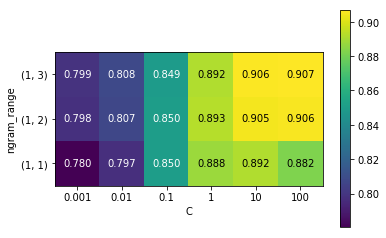

In [52]:
scores = grid.cv_results_["mean_test_score"].reshape(-1, 3).T
heatmap = mglearn.tools.heatmap(
scores, xlabel="C", ylabel="ngram_range", cmap="viridis", fmt="%.3f",
xticklabels=param_grid["logisticregression__C"],
yticklabels=param_grid["tfidfvectorizer__ngram_range"])
plt.colorbar(heatmap)

In [53]:
grid.cv_results_["mean_test_score"]

array([0.78036, 0.79796, 0.79908, 0.79732, 0.80708, 0.80844, 0.8502 ,
       0.85032, 0.84944, 0.88792, 0.89284, 0.89208, 0.89204, 0.90488,
       0.906  , 0.88232, 0.90572, 0.90692])

In [54]:
scores

array([[0.78036, 0.79732, 0.8502 , 0.88792, 0.89204, 0.88232],
       [0.79796, 0.80708, 0.85032, 0.89284, 0.90488, 0.90572],
       [0.79908, 0.80844, 0.84944, 0.89208, 0.906  , 0.90692]])

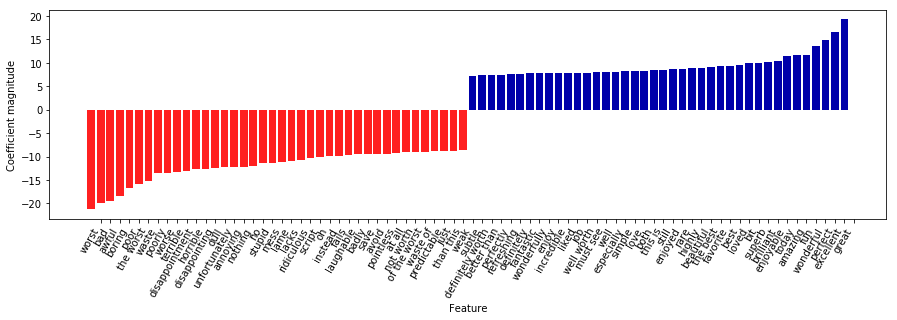

In [55]:
vect = grid.best_estimator_.named_steps["tfidfvectorizer"]
feature_names = np.array(vect.get_feature_names())
coef = grid.best_estimator_.named_steps["logisticregression"].coef_
mglearn.tools.visualize_coefficients(coef, feature_names, n_top_features=40)

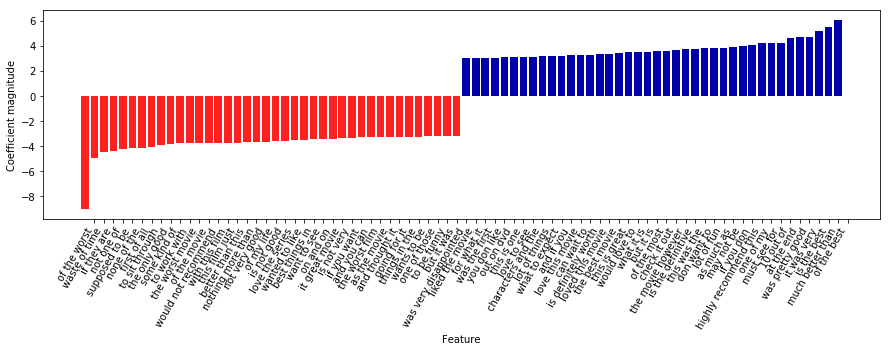

In [56]:
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 3
mglearn.tools.visualize_coefficients(coef.ravel()[mask],
                                    feature_names[mask], n_top_features=40)

# 7.8 より進んだトークン分割、 語幹処理、 見出し語化

In [57]:
import spacy
import nltk

en_nlp = spacy.load("en")
stemmer = nltk.stem.PorterStemmer()

def compare_normalization(doc):
    doc_spacy = en_nlp(doc)
    print("Lemmatization")
    print([token.lemma_ for token in doc_spacy])
    print("Stemming:")
    print([stemmer.stem(token.norm_.lower()) for token in doc_spacy])

compare_normalization(u"Our meeting today was worse than yesterday, "
"I'm scared of meeting the clients tomorrow.")

Lemmatization
['-PRON-', 'meeting', 'today', 'be', 'bad', 'than', 'yesterday', ',', '-PRON-', 'be', 'scared', 'of', 'meet', 'the', 'client', 'tomorrow', '.']
Stemming:
['our', 'meet', 'today', 'wa', 'wors', 'than', 'yesterday', ',', 'i', 'am', 'scare', 'of', 'meet', 'the', 'client', 'tomorrow', '.']


In [66]:
import re
# CountVectorizerで用いら れている トークン分割用の正規表現
# regexp used in CountVectorizer
regexp = re.compile('(?u)\\b\\w\\w+\\b')

# spacyの言語モデルを 読み込み、 トークン分割器を 取り 出す
en_nlp = spacy.load('en')
old_tokenizer = en_nlp.tokenizer
# トークン分割器を 先ほどの正規表現で置き 換える
en_nlp.tokenizer = lambda string: old_tokenizer.tokens_from_list(
regexp.findall(string))

# spacyの文書処理パイ プライ ンを 用いてカスタ ムトークン分割器を 作る
#（正規表現を 用いたトークン分割器を 組み込んである ）
def custom_tokenizer(document):
    #doc_spacy = en_nlp(document, entity=False, parse=False)
    doc_spacy = en_nlp(document)
    return [token.lemma_ for token in doc_spacy]

# CountVectorizerを カスタ ムトークン分割器を 使っ て定義する
lemma_vect = CountVectorizer(tokenizer=custom_tokenizer, min_df=5)

X_train_lemma = lemma_vect.fit_transform(text_train)

print("X_train_lemma.shape: {}".format(X_train_lemma.shape))

vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
X_train.shape


/home/yuki/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/home/yuki/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/home/yuki/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/home/yuki/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. C

/home/yuki/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/home/yuki/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/home/yuki/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/home/yuki/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. C

/home/yuki/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/home/yuki/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/home/yuki/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. Create a new Doc object instead and pass in the strings as the `words` keyword argument, for example:
from spacy.tokens import Doc
doc = Doc(nlp.vocab, words=[...])
  "__main__", mod_spec)
/home/yuki/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Tokenizer.from_list is now deprecated. C

KeyboardInterrupt: 

In [61]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

param_grid = {"C":[0.001, 0.01, 0.1, 1, 10]}
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.99,
                            train_size=0.01, random_state=0)
grid = GridSearchCV(LogisticRegression(), param_grid, cv=cv, n_jobs=4)
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.99,
            train_size=0.01),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [62]:
grid.best_score_

0.7748121212121212

In [63]:
grid.fit(X_train_lemma, y_train)
grid.best_score_

NameError: name 'X_train_lemma' is not defined

# 7.9 トピックモデリングと文書クラスタリング

In [69]:
vect = CountVectorizer(max_features=10000, max_df=.15)
X = vect.fit_transform(text_train)

In [70]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_topics=10, learning_method="batch",
                               max_iter=25, random_state=0, n_jobs=4)
document_topics = lda.fit_transform(X)

/home/yuki/.local/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


In [71]:
lda.components_.shape

(10, 10000)

In [73]:
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names,
                          sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
cast          role          show          didn          action        
role          john          funny         thought       effects       
comedy        wife          worst         10            series        
performance   plays         thing         saw           game          
funny         young         money         lot           fight         
plays         played        want          got           special       
actor         performance   actually      actors        original      
played        cast          re            wasn          star          
john          murder        nothing       am            fi            
performances  himself       stupid        though        sci           


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
musi

In [74]:
lda100 = LatentDirichletAllocation(n_topics=100, learning_method="batch",
                                  max_iter=25, random_state=0)
document_topics100 = lda100.fit_transform(X)

/home/yuki/.local/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


In [75]:
topics = np.array([7, 16, 24, 25, 28, 36, 37, 45, 51, 53, 54, 63, 89, 97])
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names, 
                          sorting=sorting, topics_per_chunk=7, n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      topic 36      topic 37      
--------      --------      --------      --------      --------      --------      --------      
dressed       didn          williams      dance         kids          freddy        part          
robert        supposed      werewolf      song          kid           nightmare     che           
woman         believe       sean          dancing       fun           rose          against       
hitchcock     actors        russell       singing       ed            street        us            
gordon        script        bond          number        wood          rape          our           
hudson        felt          robin         songs         re            dream         feel          
director      doesn         brando        music         adults        series        revolution    
wind          care          james         sing          los           last          give          
sirk      

In [76]:
music = np.argsort(document_topics100[:, 45])[::-1]


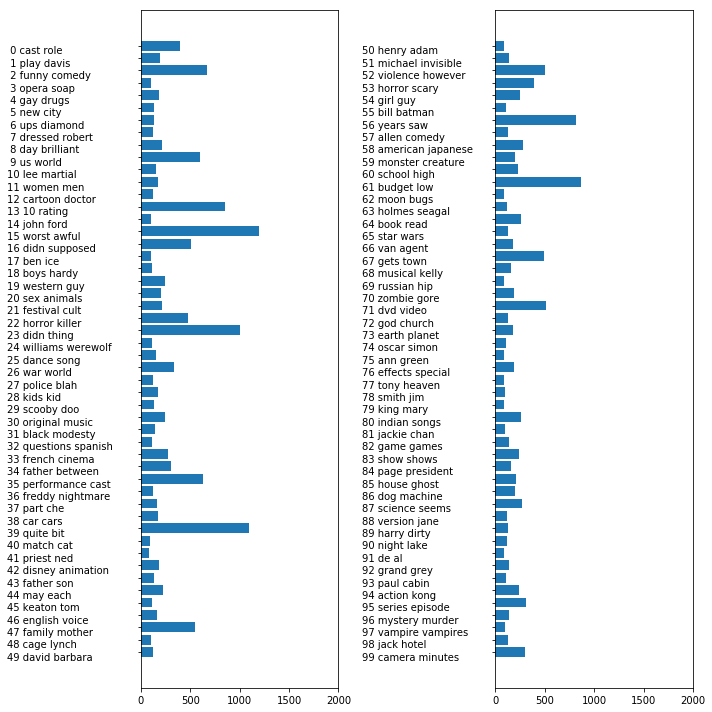

In [77]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2} ".format(i) + " ".join(words)
for i, words in enumerate(feature_names[sorting[:, :2]])]
# 2カラムの棒グラフ
for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()